In [ ]:
import pandas as pd
import numpy as np
np.random.seed(1234)
df = pd.read_pickle('data/acc_raw.pkl')

In [ ]:
df = df[~df['음주운전'].isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59589 entries, A000002 to A074483
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사고월        59589 non-null  int64  
 1   사고일        59589 non-null  int64  
 2   사고시각       59589 non-null  int64  
 3   사고요일       59589 non-null  int64  
 4   사고지역       59589 non-null  object 
 5   사망자수       59589 non-null  int64  
 6   중상자수       59589 non-null  int64  
 7   경상자수       59589 non-null  int64  
 8   부상신고자수     59589 non-null  int64  
 9   사고유형_대범주   59589 non-null  object 
 10  사고유형_소범주   59589 non-null  object 
 11  법규위반       59589 non-null  object 
 12  노면상태       59589 non-null  object 
 13  기상상태       58859 non-null  object 
 14  도로형태_대범주   59589 non-null  object 
 15  도로형태_소범주   59589 non-null  object 
 16  가해운전자차종    58158 non-null  object 
 17  가해운전자성별    58163 non-null  object 
 18  가해운전자연령    58154 non-null  float64
 19  가해운전자상해정도  56084 non-null  object 
 20  피해운

In [ ]:
cat_list = df.select_dtypes(['object']).columns.tolist()
num_list = df.select_dtypes(['number']).drop(columns='음주운전').columns.tolist()

In [ ]:
from pycaret import classification as cls
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
# 옵션 찾아보고 인자 추가하기
cls.setup(data=df, target='음주운전', train_size=0.7, session_id = 1234)v

,Description,Value
0,Session id,1234
1,Target,음주운전
2,Target type,Binary
3,Original data shape,"(59589, 25)"
4,Transformed data shape,"(59589, 114)"
5,Transformed train set shape,"(41712, 114)"
6,Transformed test set shape,"(17877, 114)"
7,Ordinal features,1
8,Numeric features,10
9,Categorical features,14


In [ ]:
from sklearn.metrics import average_precision_score
cls.add_metric('apc', 'APC', average_precision_score, target = 'pred_proba')

Name                                                               APC
Display Name                                                       APC
Score Function       <function average_precision_score at 0x153851a20>
Scorer               make_scorer(average_precision_score, needs_pro...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: apc, dtype: object

In [ ]:
# 모델도 알아서 골라줌
# n_select -> 스태킹, 느린데 해볼만함 (601 자료)
top_model = cls.compare_models(n_select=1, sort='apc')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:13:49
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


In [ ]:
print(top_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1234, verbose=0, warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

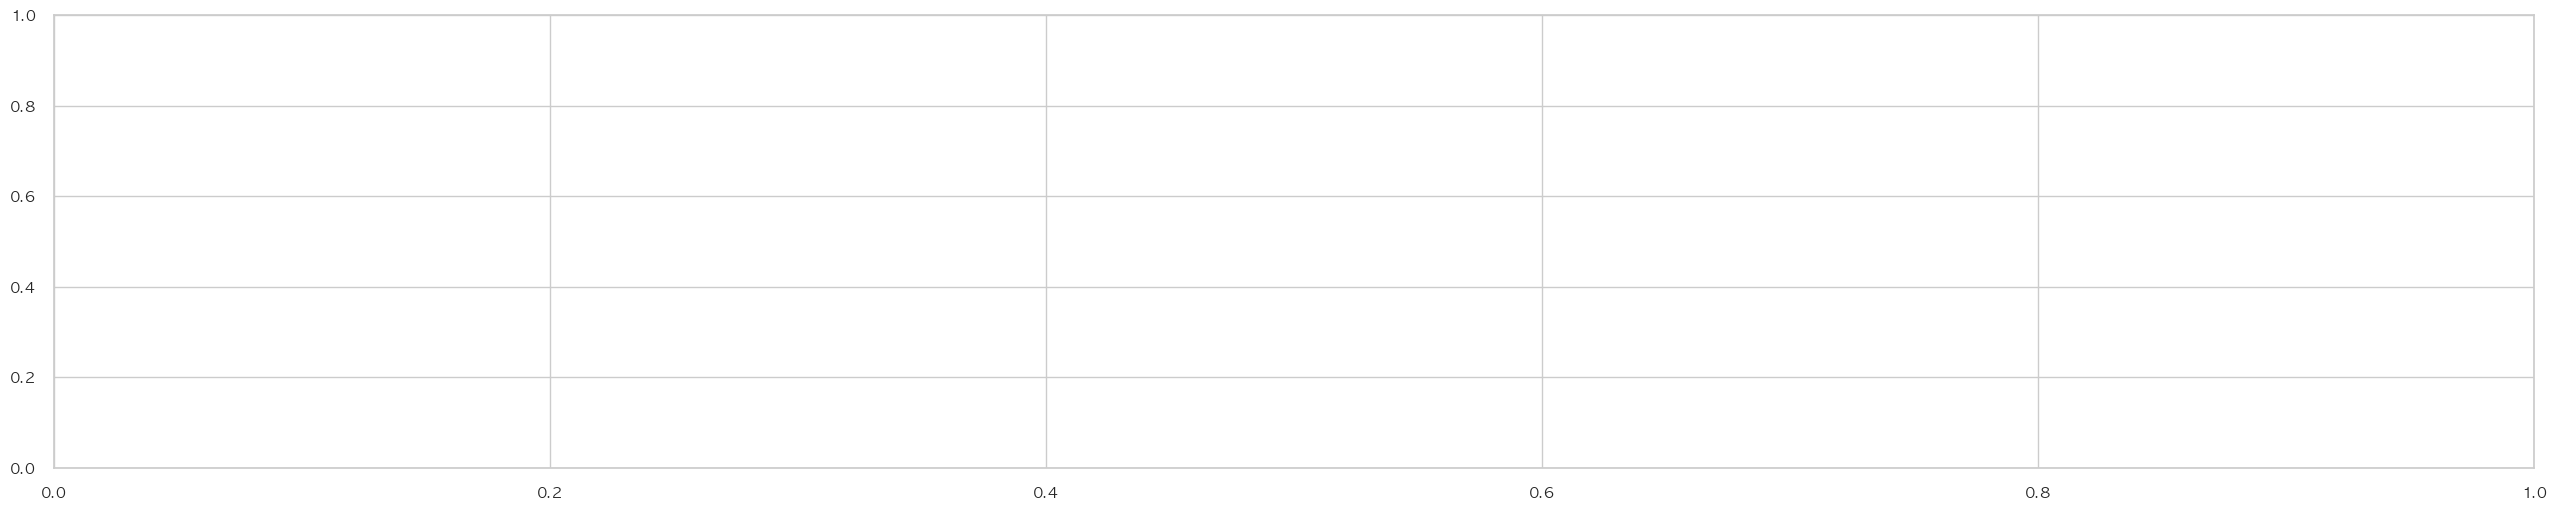

In [ ]:
cls.evaluate_model(top_model)

In [ ]:
final_model = cls.finalize_model(top_model)

In [ ]:
cls.save_model(final_model, 'automl_ver01')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/vt/76d2nkdd2msb93lkngc6yv1r0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['사고월', '사고일', '사고시각', '사고요일',
                                              '사망자수', '중상자수', '경상자수', '부상신고자수',
                                              '가해운전자연령', '피해운전자연령'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verb...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class

In [ ]:
te = pd.read_pickle('data/acc_raw.pkl')
te = te[te['음주운전'].isnull()]
te = te.drop(columns='음주운전')

In [ ]:
pred = cls.predict_model(final_model, data=te, raw_score=True)
pred.head()

,사고월,사고일,사고시각,사고요일,사고지역,사망자수,중상자수,경상자수,부상신고자수,사고유형_대범주,...,가해운전자성별,가해운전자연령,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,prediction_label,prediction_score_0,prediction_score_1
my_id,,,,,,,,,,,,,,,,,,,,,
A051970,8,8,22,5,서초구,0,1,0,0,차대차,...,여,47.0,상해없음,승용,남,78.0,중상,0,0.89,0.11
A036817,9,2,22,2,강남구,0,0,2,0,차대차,...,남,48.0,상해없음,승용,남,67.0,경상,0,0.89,0.11
A021606,7,21,5,1,동작구,0,0,3,0,차대차,...,여,26.0,상해없음,승합,남,39.0,경상,0,0.72,0.28
A018391,12,30,18,2,강동구,0,0,2,0,차대차,...,남,46.0,상해없음,승용,남,25.0,경상,0,0.69,0.31
A002771,10,30,21,2,은평구,0,0,1,0,차대사람,...,남,46.0,상해없음,보행자,여,66.0,경상,0,0.98,0.02


In [ ]:
pred = pred[['prediction_score_1']].reset_index()
pred.columns = ['my_id','prob']
pred.head()

,my_id,prob
0,A051970,0.11
1,A036817,0.11
2,A021606,0.28
3,A018391,0.31
4,A002771,0.02


In [ ]:
pred.to_csv('first_submission.csv', index=False)

* 월요일 아침, 주말여부
* 사고월(연말)
* 시각(범주형으로 바꾸면 도움됨) - 음주운전 시간대
* threshold 0.28 정도가 좋음
* 스태킹 느린데 해볼만함 (compare_model) 601자료


* 피쳐엔지니어링 - 범주형 변수의 범주를 줄여야함
* 파이캐럿 - 파라미터 조절 잘하기
* 자료도있음
